### Importa√ß√£o dos dados



In [41]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()
loja2.head()
loja3.head()
loja4.head()

Produto Categoria do Produto    Pre√ßo      Frete  \
0          Lava lou√ßas     eletrodomesticos  1446.46  74.604083   
1             Cama box               moveis   631.70  33.919251   
2     Bola de basquete      esporte e lazer    31.54   0.000000   
3  Modelagem preditiva               livros    76.93   1.680730   
4       Fone de ouvido          eletronicos   185.14   7.442587   

  Data da Compra        Vendedor Local da compra  Avalia√ß√£o da compra  \
0     11/11/2022    Rafael Costa              SP                    4   
1     03/01/2020    Thiago Silva              GO                    5   
2     25/12/2022   Larissa Alves              MG                    5   
3     23/11/2021  Lucas Oliveira              MG                    3   
4     25/04/2022   Bianca Santos              SP                    4   

  Tipo de pagamento  Quantidade de parcelas    lat    lon  
0    cartao_credito                       3 -22.19 -48.79  
1    cartao_credito                       2 -15.98 -49.86  
2            boleto                       1 -18.10 -44.38  
3            boleto                       1 -18.10 -44.38  
4    cartao_credito                       7 -22.19 -48.79

#1. An√°lise do faturamento


   Local da compra      Pre√ßo
24              SP  586673.21
18              RJ  230010.44
10              MG  165802.37
21              RS  111347.05
17              PR   94643.66
22              SC   56332.09
8               GO   50505.47
4               BA   43877.34
6               DF   29729.23
15              PE   23439.02
7               ES   18620.76
5               CE   17597.97
12              MT   15444.54
13              PA   12884.92
14              PB   12737.79
11              MS   11798.61
1               AL   10703.35
25              TO    9549.53
19              RN    7257.66
23              SE    6154.07
20              RO    5501.27
16              PI    4658.58
9               MA    4115.02
0               AC    2320.42
2               AM    1495.21
3               AP    1309.54


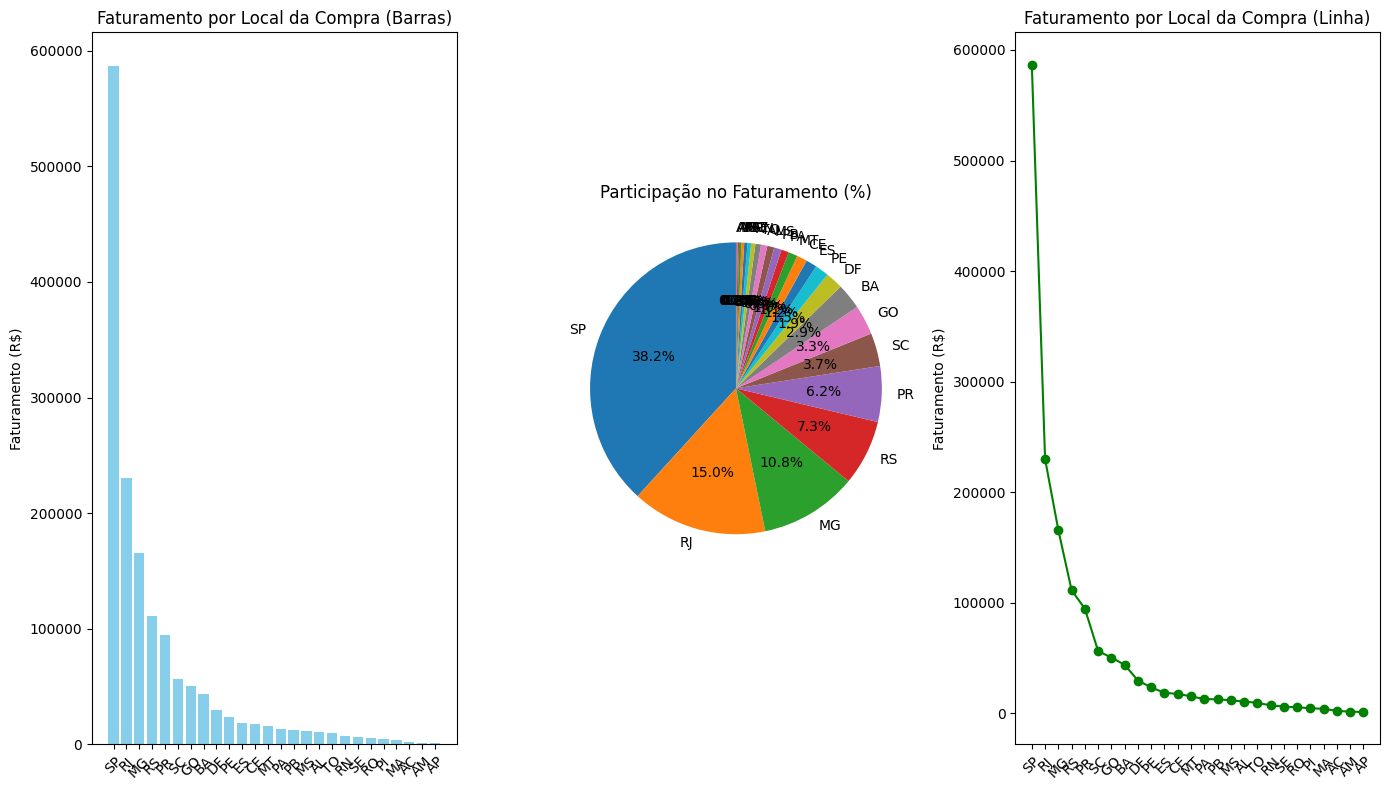

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# C√°lculo do faturamento total por loja
faturamento_por_loja = loja.groupby("Local da compra")["Pre√ßo"].sum().reset_index()

# Ordenar para visualiza√ß√£o mais clara
faturamento_por_loja = faturamento_por_loja.sort_values(by="Pre√ßo", ascending=False)

# Exibir a tabela no console
print(faturamento_por_loja)

# Criar os 3 gr√°ficos
plt.figure(figsize=(14, 8))

# 1Ô∏è‚É£ Gr√°fico de Barras
plt.subplot(1, 3, 1)
plt.bar(faturamento_por_loja["Local da compra"], faturamento_por_loja["Pre√ßo"], color="skyblue")
plt.title("Faturamento por Local da Compra (Barras)")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45)

# 2Ô∏è‚É£ Gr√°fico de Pizza
plt.subplot(1, 3, 2)
plt.pie(faturamento_por_loja["Pre√ßo"], labels=faturamento_por_loja["Local da compra"], autopct="%1.1f%%", startangle=90)
plt.title("Participa√ß√£o no Faturamento (%)")

# 3Ô∏è‚É£ Gr√°fico de Linha
plt.subplot(1, 3, 3)
plt.plot(faturamento_por_loja["Local da compra"], faturamento_por_loja["Pre√ßo"], marker="o", color="green")
plt.title("Faturamento por Local da Compra (Linha)")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


Categorias mais populares por loja:
    Local da compra   Categoria do Produto  Quantidade Vendida
0                AC       eletrodomesticos                   1
5                AL            eletronicos                   9
17               AM                 moveis                   4
22               AP  instrumentos musicais                   3
30               BA                 moveis                  71
34               CE            eletronicos                  28
40               DF             brinquedos                  50
54               ES                 moveis                  37
62               GO                 moveis                  46
70               MA                 moveis                  17
73               MG            eletronicos                 219
81               MS            eletronicos                  14
93               MT                 moveis                  16
97               PA            eletronicos                  16
106              PB

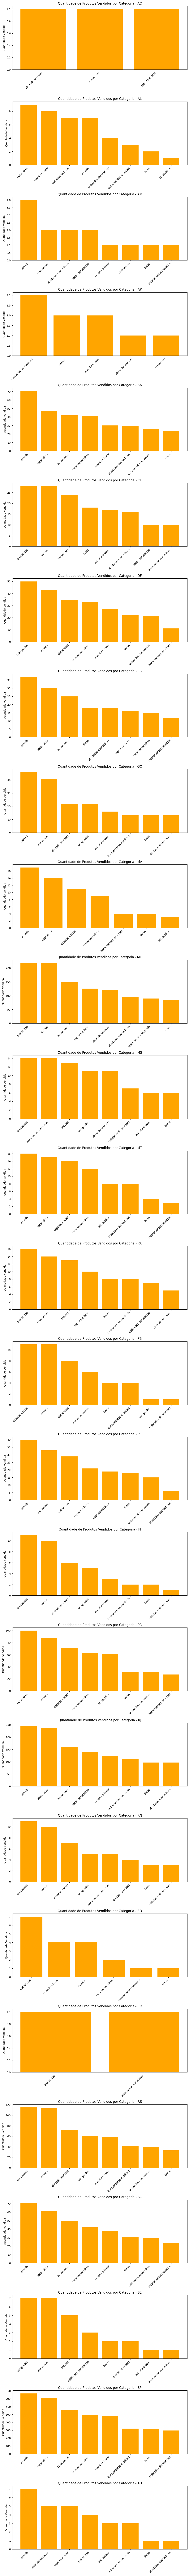

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

for var in [loja, loja2, loja3, loja4]:
    if not isinstance(var, pd.DataFrame):
        raise TypeError(f"Expected a pandas DataFrame, but found type: {type(var)}")

# Concatenate all dataframes into a single dataframe
all_lojas_df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)


# Calcular quantidade de produtos vendidos por Loja e Categoria
vendas_por_categoria_loja = (
    all_lojas_df.groupby(["Local da compra", "Categoria do Produto"])["Produto"]
    .count()
    .reset_index(name="Quantidade Vendida")
)

# Encontrar a categoria mais popular em cada loja
categorias_populares = vendas_por_categoria_loja.sort_values(
    by=["Local da compra", "Quantidade Vendida"], ascending=[True, False]
).groupby("Local da compra").head(1)

print("Categorias mais populares por loja:")
print(categorias_populares)

# ----- Visualiza√ß√£o -----
lojas_unicas = vendas_por_categoria_loja["Local da compra"].unique()
fig, axes = plt.subplots(len(lojas_unicas), 1, figsize=(10, 5 * len(lojas_unicas)))

if len(lojas_unicas) == 1:
    axes = [axes]  # garante que seja iter√°vel mesmo com 1 loja

for ax, loja_nome in zip(axes, lojas_unicas):
    dados_loja = vendas_por_categoria_loja[vendas_por_categoria_loja["Local da compra"] == loja_nome]
    dados_loja = dados_loja.sort_values(by="Quantidade Vendida", ascending=False)

    ax.bar(dados_loja["Categoria do Produto"], dados_loja["Quantidade Vendida"], color="orange")
    ax.set_title(f"Quantidade de Produtos Vendidos por Categoria - {loja_nome}")
    ax.set_ylabel("Quantidade Vendida")
    ax.set_xticks(range(len(dados_loja["Categoria do Produto"]))) # Set explicit ticks
    ax.set_xticklabels(dados_loja["Categoria do Produto"], rotation=45, ha="right")


plt.tight_layout()
plt.show()

# 3. M√©dia de Avalia√ß√£o das Lojas

   Local da compra  M√©dia de Avalia√ß√£o
19              RN            4.208333
25              SP            4.113619
12              MT            4.112500
11              MS            4.097561
10              MG            4.090744
14              PB            4.086957
17              PR            4.078224
2               AM            4.071429
6               DF            4.020661
22              RS            4.018727
7               ES            4.017544
23              SC            4.011561
15              PE            3.977901
8               GO            3.940860
20              RO            3.894737
26              TO            3.827586
4               BA            3.803226
16              PI            3.800000
3               AP            3.777778
18              RJ            3.777228
13              PA            3.691358
9               MA            3.677419
0               AC            3.666667
1               AL            3.634146
5               CE    

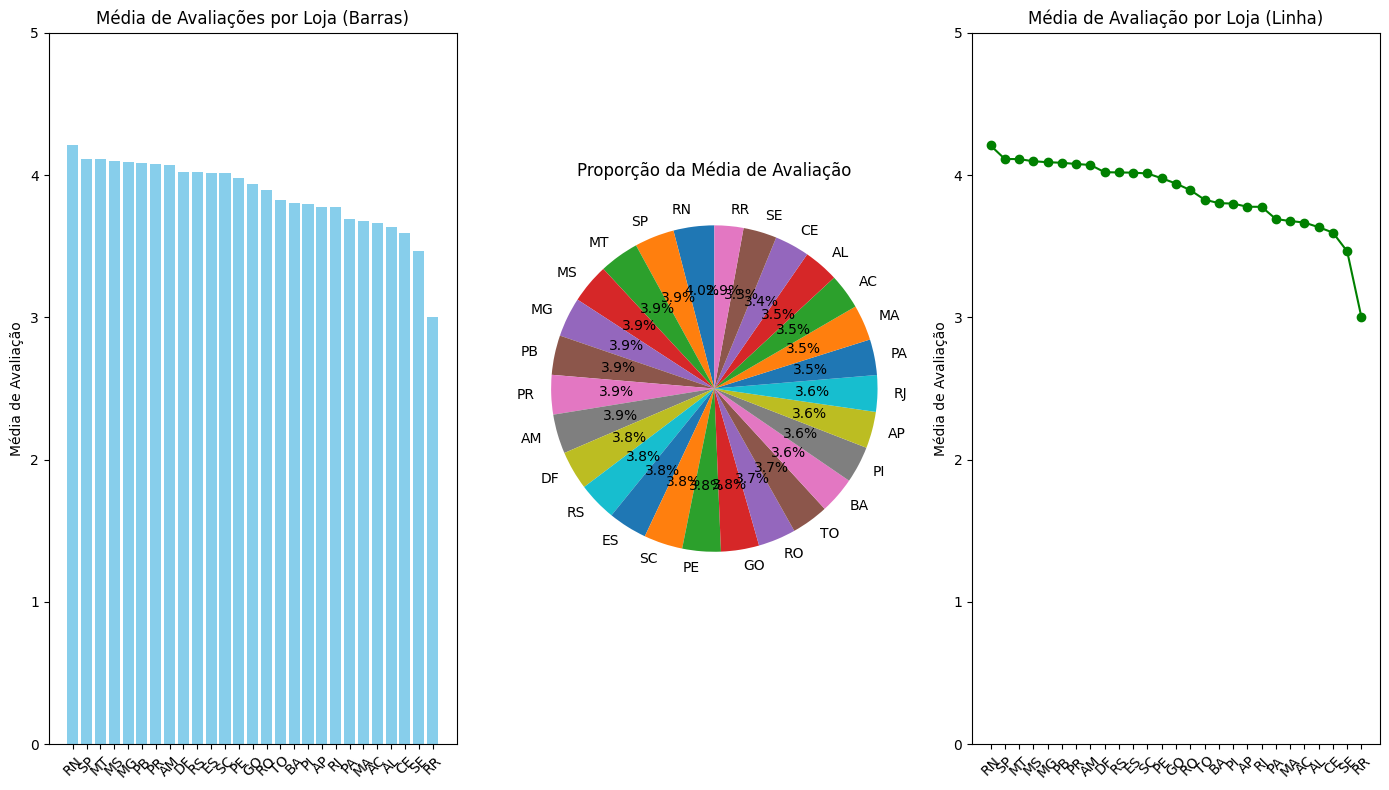

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular m√©dia das avalia√ß√µes por loja
media_avaliacao = (
    all_lojas_df.groupby("Local da compra")["Avalia√ß√£o da compra"]
      .mean()
      .reset_index(name="M√©dia de Avalia√ß√£o")
)

# Ordenar da maior para a menor m√©dia
media_avaliacao = media_avaliacao.sort_values(by="M√©dia de Avalia√ß√£o", ascending=False)

# Exibir no console
print(media_avaliacao)

# Criar os gr√°ficos
plt.figure(figsize=(14, 8))

# 1Ô∏è‚É£ Gr√°fico de Barras
plt.subplot(1, 3, 1)
plt.bar(media_avaliacao["Local da compra"], media_avaliacao["M√©dia de Avalia√ß√£o"], color="skyblue")
plt.title("M√©dia de Avalia√ß√µes por Loja (Barras)")
plt.ylabel("M√©dia de Avalia√ß√£o")
plt.ylim(0, 5)  # Avalia√ß√£o da compra vai de 1 a 5
plt.xticks(rotation=45)

# 2Ô∏è‚É£ Gr√°fico de Pizza
plt.subplot(1, 3, 2)
plt.pie(
    media_avaliacao["M√©dia de Avalia√ß√£o"],
    labels=media_avaliacao["Local da compra"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Propor√ß√£o da M√©dia de Avalia√ß√£o")

# 3Ô∏è‚É£ Gr√°fico de Linha
plt.subplot(1, 3, 3)
plt.plot(
    media_avaliacao["Local da compra"],
    media_avaliacao["M√©dia de Avalia√ß√£o"],
    marker="o",
    color="green"
)
plt.title("M√©dia de Avalia√ß√£o por Loja (Linha)")
plt.ylabel("M√©dia de Avalia√ß√£o")
plt.ylim(0, 5) # Avalia√ß√£o da compra vai de 1 a 5
plt.xticks(rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Contagem de vendas por produto e loja
vendas_produto = (
    all_lojas_df.groupby(["Loja", "Produto"])["Produto"]
      .count()
      .reset_index(name="Quantidade Vendida")
)

# Ordenar por loja e quantidade
vendas_produto = vendas_produto.sort_values(
    by=["Loja", "Quantidade Vendida"], ascending=[True, False]
)

# Identificar mais vendidos e menos vendidos por loja
mais_vendidos = vendas_produto.groupby("Loja").head(1).reset_index(drop=True)
menos_vendidos = vendas_produto.groupby("Loja").tail(1).reset_index(drop=True)

print("üìà Produtos mais vendidos por loja:")
print(mais_vendidos)
print("\nüìâ Produtos menos vendidos por loja:")
print(menos_vendidos)

# Unir mais e menos vendidos para visualiza√ß√£o
destaques = pd.concat([mais_vendidos, menos_vendidos])
destaques["Tipo"] = ["Mais Vendido"] * len(mais_vendidos) + ["Menos Vendido"] * len(menos_vendidos)

# Criar os gr√°ficos
plt.figure(figsize=(15, 8))

# 1Ô∏è‚É£ Gr√°fico de Barras (Compara√ß√£o mais x menos vendido)
plt.subplot(1, 3, 1)
cores = ["green" if t == "Mais Vendido" else "red" for t in destaques["Tipo"]]
plt.bar(destaques["Produto"], destaques["Quantidade Vendida"], color=cores)
plt.title("Mais e Menos Vendidos por Loja (Barras)")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)

# 2Ô∏è‚É£ Gr√°fico de Pizza (por loja, mais vendido)
plt.subplot(1, 3, 2)
plt.pie(
    mais_vendidos["Quantidade Vendida"],
    labels=mais_vendidos["Produto"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Participa√ß√£o dos Mais Vendidos (por loja)")

# 3Ô∏è‚É£ Gr√°fico de Linha (Todos os destaques)
plt.subplot(1, 3, 3)
for loja in destaques["Loja"].unique():
    dados_loja = destaques[destaques["Loja"] == loja]
    plt.plot(dados_loja["Produto"], dados_loja["Quantidade Vendida"], marker="o", label=loja)
plt.title("Compara√ß√£o dos Destaques por Loja (Linha)")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


KeyError: 'Loja'

KeyError: 'Loja'

# 5. Frete M√©dio por Loja


   Local da compra  Custo M√©dio de Frete
21              RR                113.67
0               AC                 49.36
20              RO                 46.35
19              RN                 40.09
8               GO                 38.13
16              PI                 36.95
22              RS                 36.58
15              PE                 35.72
9               MA                 35.13
17              PR                 34.57
18              RJ                 33.94
14              PB                 33.91
11              MS                 33.69
26              TO                 33.46
10              MG                 33.46
1               AL                 33.26
7               ES                 33.20
25              SP                 32.71
12              MT                 32.69
13              PA                 30.63
24              SE                 30.49
4               BA                 30.26
6               DF                 30.19
23             

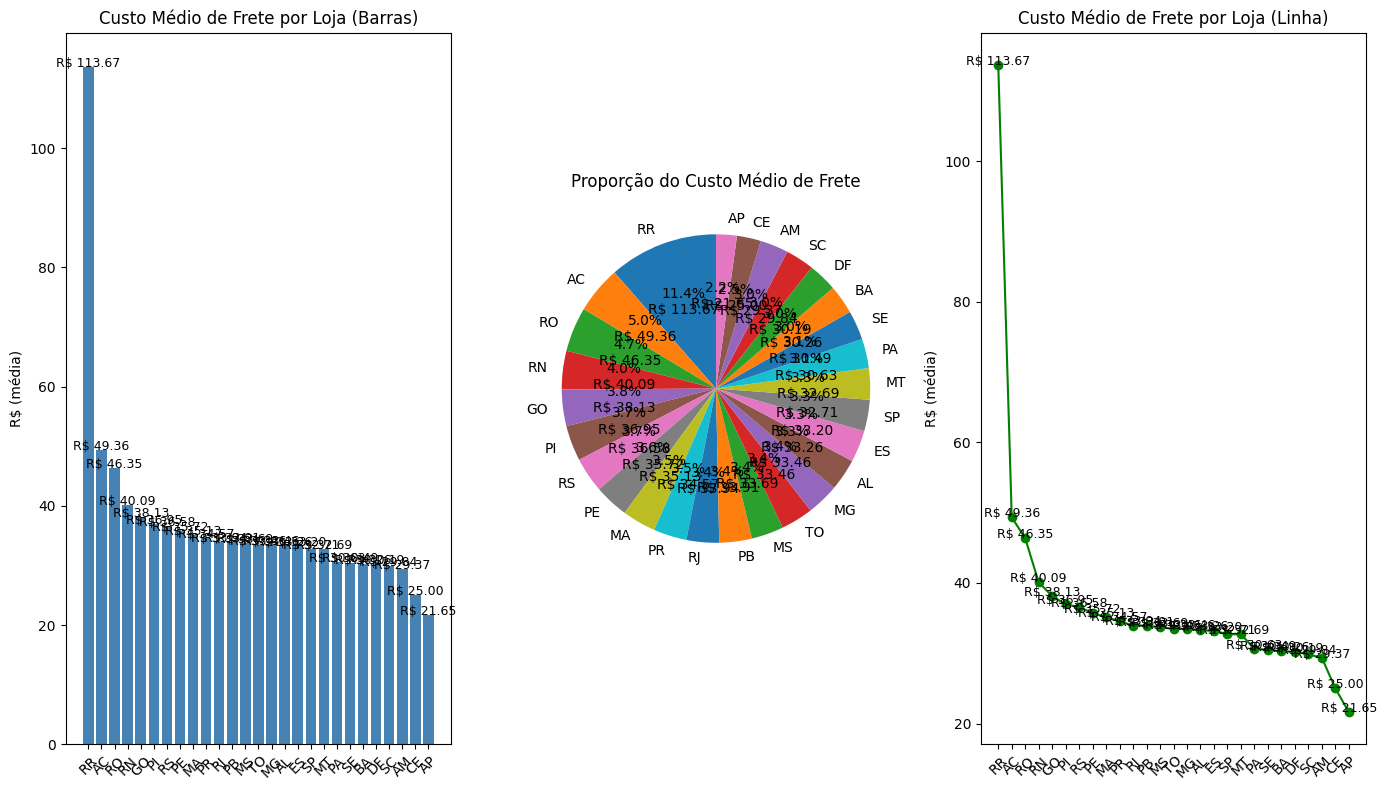

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular custo m√©dio de frete por loja
media_frete = (
    all_lojas_df.groupby("Local da compra")["Frete"]
      .mean()
      .reset_index(name="Custo M√©dio de Frete")
)

# Ordenar do maior para o menor
media_frete = media_frete.sort_values(by="Custo M√©dio de Frete", ascending=False)

# Mostrar no console formatado em R$
media_frete["Custo M√©dio de Frete"] = media_frete["Custo M√©dio de Frete"].round(2)
print(media_frete)

# Criar gr√°ficos
plt.figure(figsize=(14, 8))

# 1Ô∏è‚É£ Gr√°fico de Barras com valores
plt.subplot(1, 3, 1)
plt.bar(media_frete["Local da compra"], media_frete["Custo M√©dio de Frete"], color="steelblue")
for i, v in enumerate(media_frete["Custo M√©dio de Frete"]):
    plt.text(i, v + 0.02, f"R$ {v:,.2f}", ha='center', fontsize=9)
plt.title("Custo M√©dio de Frete por Loja (Barras)")
plt.ylabel("R$ (m√©dia)")
plt.xticks(rotation=45)

# 2Ô∏è‚É£ Gr√°fico de Pizza
plt.subplot(1, 3, 2)
plt.pie(
    media_frete["Custo M√©dio de Frete"],
    labels=media_frete["Local da compra"],
    autopct=lambda p: f"{p:.1f}%\nR$ {(p/100)*media_frete['Custo M√©dio de Frete'].sum():,.2f}",
    startangle=90
)
plt.title("Propor√ß√£o do Custo M√©dio de Frete")

# 3Ô∏è‚É£ Gr√°fico de Linha com valores
plt.subplot(1, 3, 3)
plt.plot(
    media_frete["Local da compra"],
    media_frete["Custo M√©dio de Frete"],
    marker="o",
    color="green"
)
for i, v in enumerate(media_frete["Custo M√©dio de Frete"]):
    plt.text(i, v + 0.02, f"R$ {v:,.2f}", ha='center', fontsize=9)
plt.title("Custo M√©dio de Frete por Loja (Linha)")
plt.ylabel("R$ (m√©dia)")
plt.xticks(rotation=45)

# Ajustar layout
plt.tight_layout()
plt.show()

Relat√≥rio


Entendendo o faturamento das lojas as que est√£o no Sudeste faturam mais pois √© onde est√° a base clientes da franquia, o custo m√©dio de frete para regi√µes Norte √© extremamente caro wespecialmente em RR e a s avali√ß√£oes dos produtos e n√£o est√° boa, logo concluo que a loja que deve ser vendida √© a que mais atente da regi√£o norte nordeste.